In [1]:
# Imports and font configuration (do NOT apply seaborn styles)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns  # only used to load the dataset (no styling)
import os

# Robust Korean font selection: try Malgun Gothic, Nanum, Noto, AppleGothic
preferred = ['Malgun', '맑은고딕', 'Nanum', 'Noto', 'AppleGothic']
font_path = None
font_name = None
for fp in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    try:
        name = fm.FontProperties(fname=fp).get_name()
    except Exception:
        continue
    if any(p in name for p in preferred):
        font_path = fp
        font_name = name
        break

if font_path:
    prop = fm.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = prop.get_name()
    matplotlib.rcParams['font.sans-serif'] = [prop.get_name()]
    print('설정된 폰트:', prop.get_name(), '->', font_path)
else:
    # Fallback: set common families and rely on system fallback
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    print('한글용 권장 폰트 미발견 — 시스템 기본 폰트 사용')

matplotlib.rcParams['axes.unicode_minus'] = False

# Matplotlib appearance settings (explicit, not using seaborn.set)
plt.rcParams['figure.facecolor'] = '#f8f9fa'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#e0e0e0'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 10

# Inline plotting for notebooks
%matplotlib inline

설정된 폰트: NanumGothic -> C:\Windows\Fonts\.TTF


In [2]:
# Load the penguins dataset (uses seaborn loader only)
df = sns.load_dataset('penguins')
df = df.copy()

# 범주 값 한글 매핑: 종, 섬, 성별
species_map = {'Adelie': '아델리', 'Chinstrap': '친스트랩', 'Gentoo': '젠투'}
island_map = {'Biscoe': '비스코', 'Dream': '드림', 'Torgersen': '토르게르센'}
sex_map = {'Male': '수컷', 'Female': '암컷'}

df['species'] = df['species'].map(species_map).fillna(df['species'])
df['island'] = df['island'].map(island_map).fillna(df['island'])
df['sex'] = df['sex'].map(sex_map).fillna(df['sex'])

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,아델리,토르게르센,39.1,18.7,181.0,3750.0,수컷
1,아델리,토르게르센,39.5,17.4,186.0,3800.0,암컷
2,아델리,토르게르센,40.3,18.0,195.0,3250.0,암컷
3,아델리,토르게르센,NaN,NaN,NaN,NaN,NaN
4,아델리,토르게르센,36.7,19.3,193.0,3450.0,암컷


In [3]:
# Basic info and summary
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,아델리,비스코,NaN,NaN,NaN,NaN,수컷
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [4]:
# Missing values summary
missing = df.isnull().sum()
missing[missing > 0]

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20320\3145651925.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(groups_bill, labels=species_order, patch_artist=True, medianprops=dict(color='black'))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20320\3145651925.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(groups_mass, labels=species_order, patch_artist=True, medianprops=dict(color='black'))


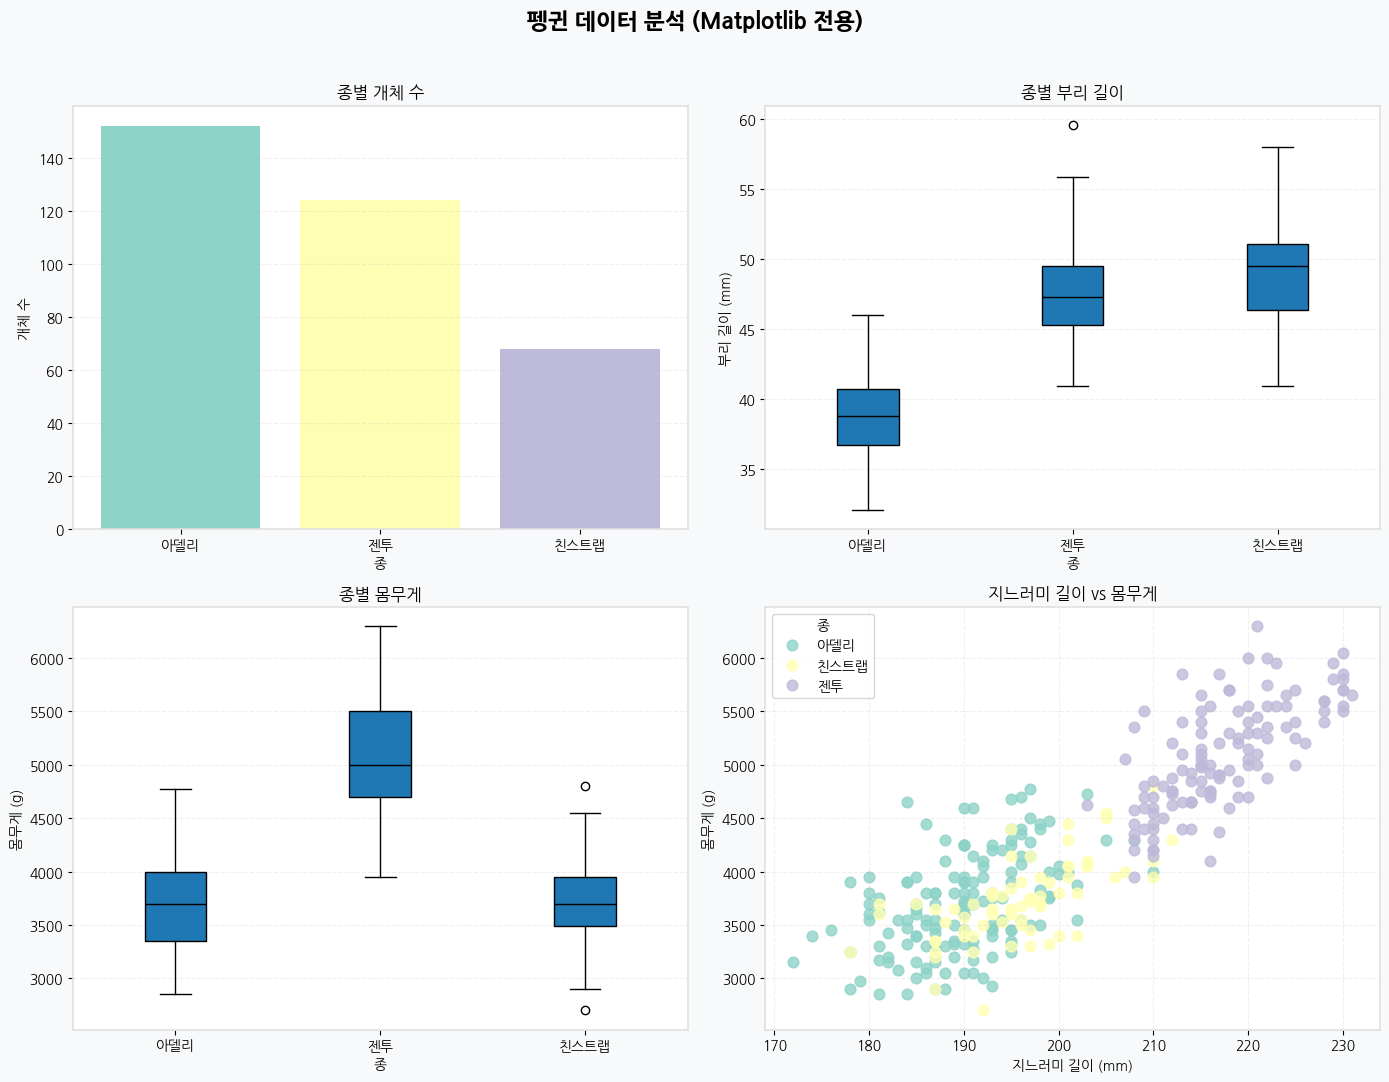

In [5]:
# Plots (Matplotlib only): counts, boxplots, and scatter
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 11))
fig.suptitle('펭귄 데이터 분석 (Matplotlib 전용)', fontsize=16, fontweight='bold')

# 1) 종별 개체 수 (막대)
counts = df['species'].value_counts(dropna=False)
colors = ['#8DD3C7', '#FFFFB3', '#BEBADA']
axes[0, 0].bar(counts.index.astype(str), counts.values, color=colors[:len(counts)])
axes[0, 0].set_title('종별 개체 수')
axes[0, 0].set_xlabel('종')
axes[0, 0].set_ylabel('개체 수')
axes[0, 0].grid(axis='y', alpha=0.2, linestyle='--')

# 2) 종별 부리 길이 (상자그림)
species_order = [s for s in counts.index if pd.notna(s)]
groups_bill = [df.loc[df['species'] == s, 'bill_length_mm'].dropna() for s in species_order]
axes[0, 1].boxplot(groups_bill, labels=species_order, patch_artist=True, medianprops=dict(color='black'))
axes[0, 1].set_title('종별 부리 길이')
axes[0, 1].set_xlabel('종')
axes[0, 1].set_ylabel('부리 길이 (mm)')
axes[0, 1].grid(axis='y', alpha=0.2, linestyle='--')

# 3) 종별 몸무게 (상자그림)
groups_mass = [df.loc[df['species'] == s, 'body_mass_g'].dropna() for s in species_order]
axes[1, 0].boxplot(groups_mass, labels=species_order, patch_artist=True, medianprops=dict(color='black'))
axes[1, 0].set_title('종별 몸무게')
axes[1, 0].set_xlabel('종')
axes[1, 0].set_ylabel('몸무게 (g)')
axes[1, 0].grid(axis='y', alpha=0.2, linestyle='--')

# 4) 지느러미 길이 vs 몸무게 (산점도) - 종별 색상
species_unique = [s for s in df['species'].unique() if pd.notna(s)]
cmap = dict(zip(species_unique, colors))
for s in species_unique:
    sub = df[df['species'] == s]
    axes[1, 1].scatter(sub['flipper_length_mm'], sub['body_mass_g'], label=str(s), alpha=0.8, s=60, color=cmap.get(s))
axes[1, 1].set_title('지느러미 길이 vs 몸무게')
axes[1, 1].set_xlabel('지느러미 길이 (mm)')
axes[1, 1].set_ylabel('몸무게 (g)')
axes[1, 1].grid(alpha=0.2, linestyle='--')
axes[1, 1].legend(title='종')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Quick numerical summaries for insights (한글 출력)
print('\n== 종별 개체 수 ==')
print(df['species'].value_counts())
print('\n== 종별 평균 몸무게 (g) ==')
print(df.groupby('species')['body_mass_g'].mean().round(1))
print('\n== 종별 평균 부리 길이 (mm) ==')
print(df.groupby('species')['bill_length_mm'].mean().round(1)) 


== 종별 개체 수 ==
species
아델리     152
젠투      124
친스트랩     68
Name: count, dtype: int64

== 종별 평균 몸무게 (g) ==
species
아델리     3700.7
젠투      5076.0
친스트랩    3733.1
Name: body_mass_g, dtype: float64

== 종별 평균 부리 길이 (mm) ==
species
아델리     38.8
젠투      47.5
친스트랩    48.8
Name: bill_length_mm, dtype: float64
